In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Navier–Stokes equations:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

$u$-momentum equation:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{split}
$$

$v$-momentum equation:

$$
\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Pressure equation:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Discretization of $u$, $v$, and $p$:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right] \\
& + \Delta t F
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right]
\end{split}
$$

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Initial conditions:

$u, v, p = 0$ everywhere

Boundary conditions:

$u, v, p$ are periodic on $x = 0, 2$

$u, v = 0$ at $y = 0,2$

$\frac{\partial p}{\partial y} = 0$ at $y = 0,2$

$F=1$ everywhere

In [2]:
def build_up_b(rho, dt, dx, dy, u, v):
    b = np.zeros_like(u)
    b[1:-1, 1:-1] = np.round((rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
                                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                            ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                            2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                                 (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                            ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2)),2)
    
    # Periodic BC Pressure @ x = 2
    b[1:-1, -1] = (rho * (1 / dt * ((u[1:-1, 0] - u[1:-1,-2]) / (2 * dx) +
                                    (v[2:, -1] - v[0:-2, -1]) / (2 * dy)) -
                          ((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 -
                          2 * ((u[2:, -1] - u[0:-2, -1]) / (2 * dy) *
                               (v[1:-1, 0] - v[1:-1, -2]) / (2 * dx)) -
                          ((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))

    # Periodic BC Pressure @ x = 0
    b[1:-1, 0] = (rho * (1 / dt * ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx) +
                                   (v[2:, 0] - v[0:-2, 0]) / (2 * dy)) -
                         ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 -
                         2 * ((u[2:, 0] - u[0:-2, 0]) / (2 * dy) *
                              (v[1:-1, 1] - v[1:-1, -1]) / (2 * dx))-
                         ((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    
    return b

In [3]:
def pressure_poisson_periodic(p, dx, dy, u, v):
    pn = np.empty_like(p)
    b = build_up_b(rho, dt, dx, dy, u, v)
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])

        # Periodic BC Pressure @ x = 2
        p[1:-1, -1] = (((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 +
                        (pn[2:, -1] + pn[0:-2, -1]) * dx**2) /
                       (2 * (dx**2 + dy**2)) -
                       dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, -1])

        # Periodic BC Pressure @ x = 0
        p[1:-1, 0] = (((pn[1:-1, 1] + pn[1:-1, -1])* dy**2 +
                       (pn[2:, 0] + pn[0:-2, 0]) * dx**2) /
                      (2 * (dx**2 + dy**2)) -
                      dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 0])
        
        # Wall boundary conditions, pressure
        p[-1, :] = p[-2, :]  # dp/dy = 0 at y = 2
        p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
    
    return p

In [94]:
## udiff method

##variable declarations
nx = 41
x = np.linspace(0, 2, nx)

nit = 50 
dx = 2 / (nx - 1)
dy = 0.05
dt = .01

##physical variables
c = 1
rho = 1
nu = .1
F = 1

##while loop running conditions
udiff_lim = 0.001

def cavity_flow(L):
    ##variable declarations
    ny = int(L/dy) + 1
    y = np.linspace(int(1-L/2), int(1+L/2), ny)
    X, Y = np.meshgrid(x, y)

    #initial conditions
    u = np.zeros((ny, nx))
    un = np.zeros((ny, nx))

    v = np.zeros((ny, nx))
    vn = np.zeros((ny, nx))

    p = np.ones((ny, nx))
    pn = np.ones((ny, nx))

    b = np.zeros((ny, nx))
    
    ##while loop running conditions
    udiff = 1
    stepcount = 0
    
    while udiff > udiff_lim:
        un = np.copy(u)
        vn = np.copy(v)
        pn = np.copy(p)
        
        p = pressure_poisson_periodic(p, dx, dy, u, v)

        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                         un[1:-1, 1:-1] * dt / dx * 
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy * 
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * 
                        (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 * 
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])) + 
                         F * dt)

        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                         un[1:-1, 1:-1] * dt / dx * 
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                         dt / (2 * rho * dy) * 
                        (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                         nu * (dt / dx**2 *
                        (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                         dt / dy**2 * 
                        (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        # Periodic BC u @ x = 2     
        u[1:-1, -1] = (un[1:-1, -1] - un[1:-1, -1] * dt / dx * 
                      (un[1:-1, -1] - un[1:-1, -2]) -
                       vn[1:-1, -1] * dt / dy * 
                      (un[1:-1, -1] - un[0:-2, -1]) -
                       dt / (2 * rho * dx) *
                      (p[1:-1, 0] - p[1:-1, -2]) + 
                       nu * (dt / dx**2 * 
                      (un[1:-1, 0] - 2 * un[1:-1,-1] + un[1:-1, -2]) +
                       dt / dy**2 * 
                      (un[2:, -1] - 2 * un[1:-1, -1] + un[0:-2, -1])) + F * dt)

        # Periodic BC u @ x = 0
        u[1:-1, 0] = (un[1:-1, 0] - un[1:-1, 0] * dt / dx *
                     (un[1:-1, 0] - un[1:-1, -1]) -
                      vn[1:-1, 0] * dt / dy * 
                     (un[1:-1, 0] - un[0:-2, 0]) - 
                      dt / (2 * rho * dx) * 
                     (p[1:-1, 1] - p[1:-1, -1]) + 
                      nu * (dt / dx**2 * 
                     (un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1]) +
                      dt / dy**2 *
                     (un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])) + F * dt)

        # Periodic BC v @ x = 2
        v[1:-1, -1] = (vn[1:-1, -1] - un[1:-1, -1] * dt / dx *
                      (vn[1:-1, -1] - vn[1:-1, -2]) - 
                       vn[1:-1, -1] * dt / dy *
                      (vn[1:-1, -1] - vn[0:-2, -1]) -
                       dt / (2 * rho * dy) * 
                      (p[2:, -1] - p[0:-2, -1]) +
                       nu * (dt / dx**2 *
                      (vn[1:-1, 0] - 2 * vn[1:-1, -1] + vn[1:-1, -2]) +
                       dt / dy**2 *
                      (vn[2:, -1] - 2 * vn[1:-1, -1] + vn[0:-2, -1])))

        # Periodic BC v @ x = 0
        v[1:-1, 0] = (vn[1:-1, 0] - un[1:-1, 0] * dt / dx *
                     (vn[1:-1, 0] - vn[1:-1, -1]) -
                      vn[1:-1, 0] * dt / dy *
                     (vn[1:-1, 0] - vn[0:-2, 0]) -
                      dt / (2 * rho * dy) * 
                     (p[2:, 0] - p[0:-2, 0]) +
                      nu * (dt / dx**2 * 
                     (vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1]) +
                      dt / dy**2 * 
                     (vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])))

        # Cylinder BCs: u, v, p = 0
        cx = 1.
        cy = 1.
        r = 0.5

        mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < (r+np.sqrt(dx**2+dy**2))**2
        u[mask] = 0
        v[mask] = 0

        '''
        # Cylinder boundary BCs: u, v, p = 0
        cx = 1.
        cy = 1.
        r = 0.5

        mask1 = (r-np.sqrt(dx**2+dy**2))**2 < (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2
        mask2 = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
        ring = mask1 & mask2
        u[ring] = 0
        v[ring] = 0
        p[ring] = 0
        '''

        # Wall BCs: u,v = 0 @ y = 0,2
        u[0, :] = 0
        u[-1, :] = 0
        v[0, :] = 0
        v[-1, :] = 0

        udiff = (np.sum(u) - np.sum(un)) / np.sum(u)
        stepcount += 1
    
    return u, v, p, stepcount, X, Y, ny, y

In [95]:
def window(list):
    row1 = int(np.floor(len(list)/2)-20)
    row2 = int(np.ceil(len(list)/2)+20)
    return row1,row2

In [112]:
L = 2
u, v, p, stepcount, X, Y, ny, y = cavity_flow(L)
print(stepcount)
y_ind = np.where(y == 1.75)[0][0]
x_ind = np.where(x == 1.00)[0][0]
print(u,v)
print(u[y_ind,x_ind],v[y_ind,x_ind])

14
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.03812488 0.03844763 0.03843337 ... 0.03936554 0.03894529 0.03838111]
 [0.06403805 0.0636945  0.06530039 ... 0.06644378 0.06443867 0.06419158]
 ...
 [0.06390815 0.06353289 0.06516351 ... 0.0662666  0.06428962 0.06403854]
 [0.03800168 0.03832713 0.03830384 ... 0.03922263 0.03881335 0.03825012]
 [0.         0.         0.         ... 0.         0.         0.        ]] [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.0010666   0.00028363 -0.00199692 ...  0.00178459 -0.00051598
   0.00088451]
 [ 0.00087383 -0.00303824 -0.00029946 ... -0.00048081  0.00258192
  -0.00138199]
 ...
 [-0.00087699  0.00309034  0.00028764 ...  0.00041246 -0.00257215
   0.00136965]
 [ 0.0010762  -0.00029614  0.0020409  ... -0.00177356  0.00049509
  -0.0008813 ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
0.08048548324021608 0.006393367478605843


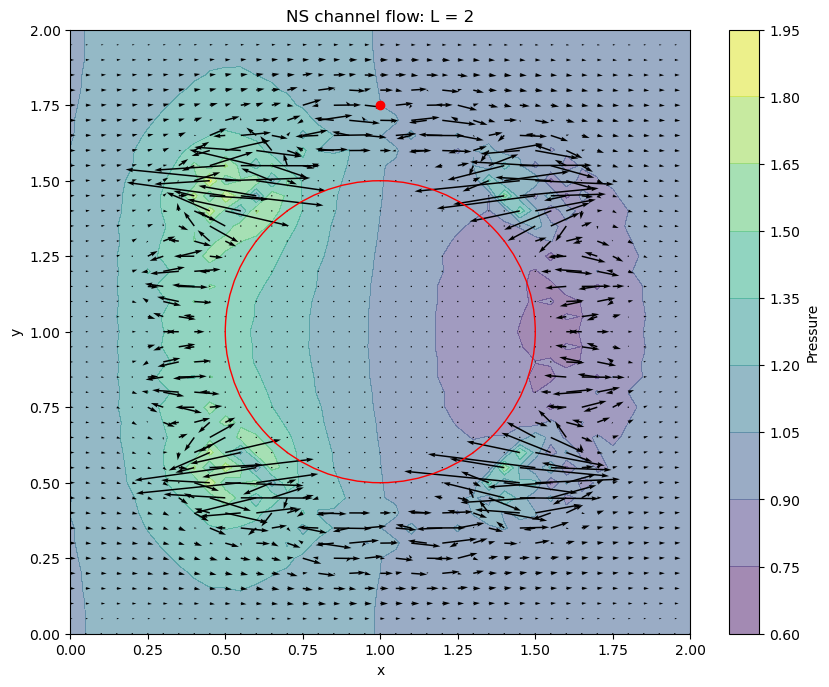

In [113]:
X_win = X[window(X)[0]:window(X)[1]]
Y_win = Y[window(Y)[0]:window(Y)[1]]
p_win = p[window(p)[0]:window(p)[1]]
u_win = u[window(u)[0]:window(u)[1]]
v_win = v[window(v)[0]:window(v)[1]]

fig, ax = pyplot.subplots(figsize = (10,8), dpi=100)

pyplot.contourf(X_win, Y_win, p_win, alpha=0.5, cmap=cm.viridis);
pyplot.colorbar(label='Pressure');

#pyplot.quiver(X_win[::3, ::3], Y_win[::3, ::3], u_win[::3, ::3], v_win[::3, ::3]);
pyplot.quiver(X_win,Y_win,u_win,v_win)

pyplot.plot(1,1.75,'ro');
circle = pyplot.Circle((1,1),0.5,color='red',fill=False);
ax.add_patch(circle);

pyplot.xlabel('x');
pyplot.ylabel('y');
pyplot.title('NS channel flow: L = '+f'{L}');